
## Hierarchical Clustering

#### Viridiana Salazar Mendez
#### Hildebrand Department of Petroleum and Geosystem Engineering, Cockrell School of Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary

Clustering analysis is one of the most powerful tools for unsupervised machine learning. 
The scope of this project is demonstrating the practical application of hierarchical clustering for unlabeled datasets. By developing a workflow based on hierarchical clustering methodology, applying it to different types of datasets, and comparing the 
cluster results with other clustering methods such as DBSCAN and K-Means Clustering, this project aims to demonstrate that this technique is helpful for grouping datasets in the feature space.


### Description

Hierarchical clustering can be classified in two types: 
* **Divisive (Top-Down):** It starts in one cluster at the top, and splits are computed recusrsively as one moves down the hierarchy.
* **Agglomerative (Bottom-Up):** It starts at the bottom, each sample in its own cluster, and clusters are merged as one moves up the hierarchy.


This workflow is focused in **agglomerative (Bottom-Up) clustering**, and it is divided in the following steps:

* Load data
* Transform features using min-max normalization
* Get the dendrogram in order to define the number of clusters
* Apply hierarchical aglomerative clustering to the dataset
* Compare hierarchical clustering with other clustering methods such as DBSCAN and K-Means Clustering


### Import Packages

We will include some standard packages. These should have been installed with Anaconda 3.

In [1]:
import numpy as np                                          # to work with arrays
import pandas as pd                                         # to work with tabular data
import os                                                   # set working directory, run executables
import matplotlib.pyplot as plt                             # for plotting
from scipy.cluster.hierarchy import dendrogram, linkage     #for dendograms and linkages used in hierarchical clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN    #for clustering methods
from sklearn import cluster, datasets                       #To work with clustering methods
from sklearn.preprocessing import StandardScaler

# widgets for interactive section
from ipywidgets import interactive, interact, interactive_output       
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox

#### Declare Functions

We are going to use the following function for feature transformation (normalization)


In [2]:
#Function for feature transformation
def Normalize(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

#Function to interact with the different datasets shapes in the dashboard
def plot(shapes, samples, noise, clustersk, clustersa, linkage, eps, min_samples):
    if shapes=="Spherical":
        X1,Y1=datasets.make_blobs(n_samples=samples, cluster_std=noise, random_state=899)
    if shapes=="non-convex":
        X1,Y1=datasets.make_moons(n_samples=samples, noise=noise)
    if shapes=="circles":
        X1,Y1=datasets.make_circles(n_samples=samples, factor=.2, noise=noise)
    if shapes=="random":
        X1,Y1=np.random.rand(samples, 2), None
    if shapes=="Facies":
        df=pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv',index_col=0)
        df['N_Porosity'] = Normalize(df['Por'])
        df['N_AI'] =  Normalize(df['AI'])
        df_subset = df.iloc[:,[3,4]]
        X1=df_subset.sample(n=samples, replace=True)
        X1, Y1=np.asarray(X1.to_numpy()), None
        X1=X1+np.random.normal(loc=0.0, scale=noise, size=X1.shape)
    #Normalize the data
    X1[:, 0] = Normalize(X1[:, 0]); X1[:, 1] = Normalize(X1[:, 1]);
    #For Aglomerative Clustering
    y_pred1= AgglomerativeClustering(n_clusters=clustersa, affinity='euclidean', linkage=linkage).fit(X1)
    plt.subplot(131)
    plt.scatter(X1[:, 0], X1[:, 1],  c=y_pred1.labels_, cmap='rainbow', alpha = 0.5, edgecolor='k')
    plt.title("Agglommerative clustering", fontsize=16, fontweight="bold"); 
    plt.xlabel("x1 normalized"); plt.ylabel("x2 normalized");
    #For K-Means Clustering
    y_pred2 = KMeans(n_clusters=clustersk, random_state=170).fit_predict(X1)
    plt.subplot(132)
    plt.scatter(X1[:, 0], X1[:, 1],  c=y_pred2, cmap='rainbow', alpha = 0.5, edgecolor='k')
    plt.title("Kmeans clustering", fontsize=16, fontweight="bold")
    plt.xlabel("x1 normalized"); plt.ylabel("x2 normalized");
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3)
    #For DBScan clustering
    y_pred3 = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X1)
    plt.subplot(133)
    plt.scatter(X1[:, 0], X1[:, 1],  c=y_pred3, cmap='rainbow', alpha = 0.5, edgecolor='k')
    plt.title("DBSCAN clustering", fontsize=16, fontweight="bold")
    plt.xlabel("x1 normalized"); plt.ylabel("x2 normalized");
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.3)

### Load data

For the first part of this demonstration the workflow uses one .csv file from the free repositorium on GitHub of GeostatsGuy.


In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv',index_col=0)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,1800.0,17.122778,4.778704,0.0,14.663434,17.674606,20.361860,30.0
AI,1800.0,625.522917,247.547997,10.0,518.076017,683.865824,783.315226,1200.0
Facies,1800.0,1.666667,0.816723,1.0,1.000000,1.000000,2.000000,3.0


### Feature transformation
As the core of hierarchical clustering is grouping data based on the distance between samples, the influence of magnitude in our calculations must be eliminated by using one of the following feature transformation methods:

* Standardization.

* Normalization

For this case we are going to use a normalized version of each by scaling the variables to range from 0 to 1.  


In [4]:
df['N_Porosity'] = Normalize(df['Por'])
df['N_AI'] =  Normalize(df['AI'])
df_subset = df.iloc[:,[3,4]]          # extract the normalized features of the main dataset in a new dataset
df_subset.head()                      # preview the new DataFrame

,N_Porosity,N_AI
0,0.299356,0.312014
1,0.337855,0.247437
2,0.538338,0.154292
3,0.456550,0.164519
4,0.437761,0.236012


### Apply linkage methods to get the dendogram (<ins>Note:the dendrogram is time computationally expensive</ins>)

In agglomerative hierarchical clustering, all the samples star as individual clusters. They are merged by using linkage methods. The most used linkage methods are described below:


* **Single linkage**- for this scheme, 2 clusters with the closest minimum distance are merged, and the process repeats until there is just a single cluster left.

* **Complete linkage**-for this scheme, 2 clusters with the closest maximum distance are merged, and the process repeats until just a single cluster is left.

* **Ward's linkage**-for this scheme, 2 clusters with the lowest error sum of squares are merged, and the process repeats until just a single cluster is left.

* **Average linkage**-for this scheme, 2 clusters with the lowest average distance are merged, and the process repeats until there is just a single cluster left.


A dendrogram is a diagram that represents the arrangement of the clusters produced from the dataset by applying any of the linkage methods explained above. We will plot the graph using the dendrogram function from the scipy library.

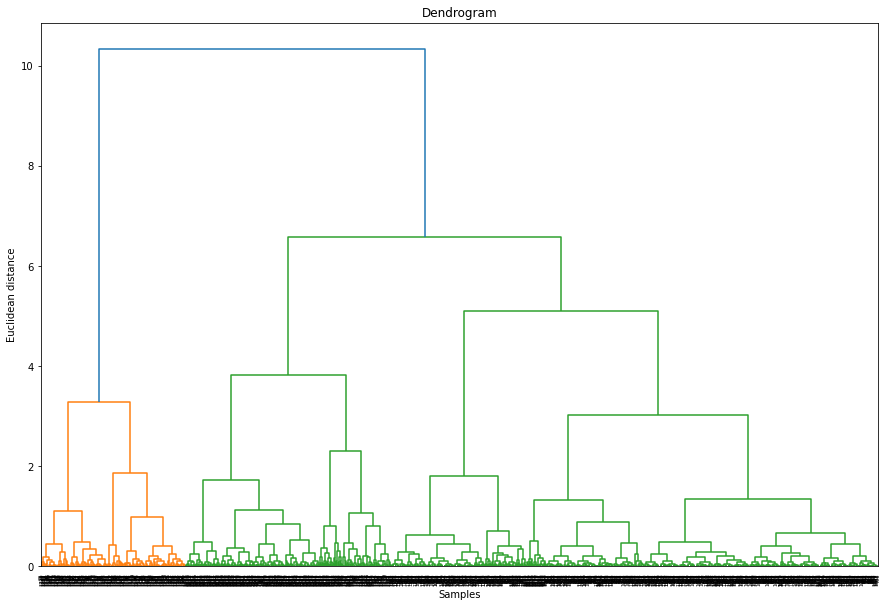

In [5]:
Tree= linkage(df_subset, 'ward')
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Tree)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
plt.show()

### Get the number of clusters from Dendogram Tree

We cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure the red line can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

<p align="center">
    <img src="https://raw.githubusercontent.com/samevi8/Hierarchical-Clustering/main/Dendrogram.png" width="3000" height="250" />

</p>


In [6]:
#Define the number of clusters based on the dendogram
nclusters=3

#Label the sample data applying agglomerative clustering
cluster_ward= AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='ward').fit(df_subset)
cluster_single= AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='average').fit(df_subset)
cluster_complete= AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='complete').fit(df_subset) 
cluster_average= AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='single').fit(df_subset)

### Plot and compare hierarchical clustering with different types of linkages

Due to the computational time to get each dendrogram, we are going to apply directly the different types of linkage that are mentioned in the previus section: Single, Average, Complete and Wards to agglomerative hierarchical clustering function in Sklearn.

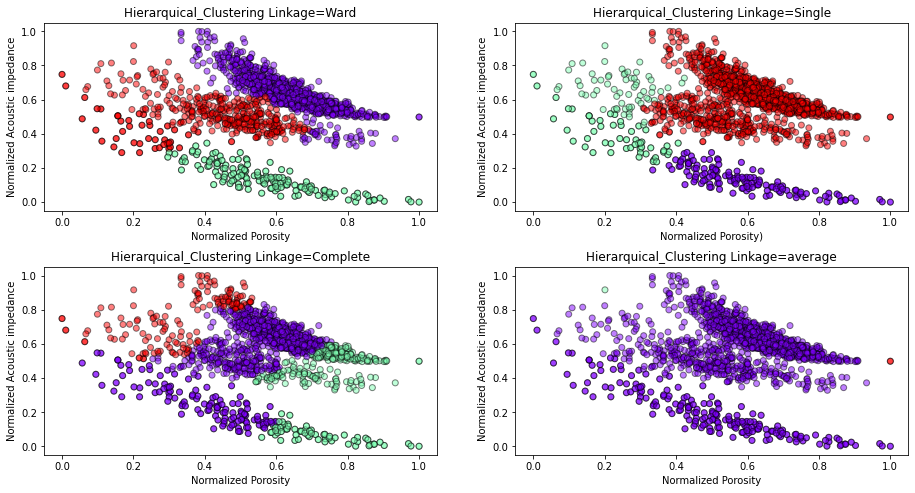

In [7]:
plt.subplot(221)
plt.scatter(df_subset.N_Porosity, df_subset.N_AI, c=cluster_ward.labels_, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('Hierarquical_Clustering Linkage=Ward'); 
plt.xlabel('Normalized Porosity'); 
plt.ylabel('Normalized Acoustic impedance')
plt.subplot(222)
plt.scatter(df_subset.N_Porosity, df_subset.N_AI, c=cluster_single.labels_, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('Hierarquical_Clustering Linkage=Single'); 
plt.xlabel('Normalized Porosity)'); 
plt.ylabel('Normalized Acoustic impedance')
plt.subplot(223)
plt.scatter(df_subset.N_Porosity, df_subset.N_AI, c=cluster_complete.labels_, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('Hierarquical_Clustering Linkage=Complete'); 
plt.xlabel('Normalized Porosity'); 
plt.ylabel('Normalized Acoustic impedance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.3)
plt.subplot(224)
plt.scatter(df_subset.N_Porosity, df_subset.N_AI, c=cluster_average.labels_, cmap='rainbow', alpha=0.5, edgecolor='k')
plt.title('Hierarquical_Clustering Linkage=average'); 
plt.xlabel('Normalized Porosity'); 
plt.ylabel('Normalized Acoustic impedance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.5, wspace=0.2, hspace=0.3)

### Create unlabeled synthetic datasets with different shapes

The clustering methods are sensitive to the shape of the dataset, for example K-means clustering is a method disigned for spherical shapes. We are going to create different datasets with different shapes in order to compere K-Means, DBSCAN and Hierarchical clustering (Addditional to the dataset taken from the free repositorium on GitHub of GeostatsGuy.

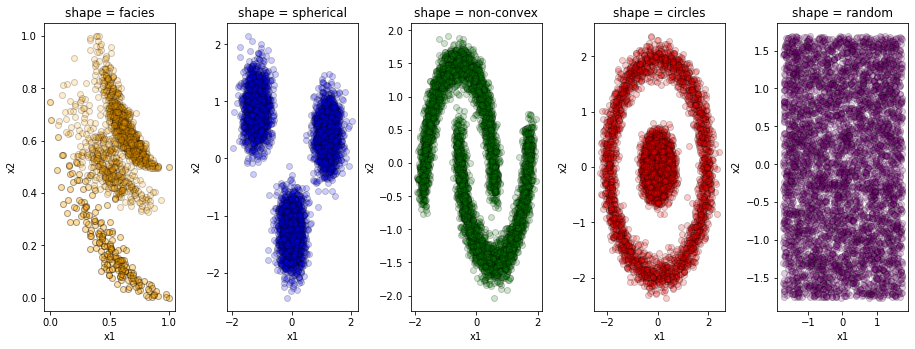

In [8]:
#The idea of this kind of "Toy datasets" was taken from scikit-learn documentation.

samples=5000 #Define the number of samples
noise=0.08   #Noise assigned to each dataset

circles = datasets.make_circles(n_samples=samples, factor=.2, noise=noise)
#Create a dataset with moon shapes
moons = datasets.make_moons(n_samples=samples, noise=noise)
#Create a dataset with blobs shapes
blobs = datasets.make_blobs(n_samples=samples, random_state=899)
#Ramdom shape
random = np.random.rand(samples, 2), None
shapes=[blobs, moons, circles, random]
color=["blue", "green", "red", "purple"]
form=["spherical", "non-convex", "circles", "random"]
for i, shape in enumerate(shapes):
    X,Y=shape
    X = StandardScaler().fit_transform(X) #Standardize features by removing the mean and scaling to unit variance.
    plt.subplot(1,5,i+2)
    plt.scatter(X[:, 0], X[:, 1], color = color[i],alpha = 0.2, edgecolor='k')
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.3)
    plt.title("shape = " + form[i])
    plt.xlabel("x1"); plt.ylabel("x2");
plt.subplot(1,5,1)
plt.scatter(df_subset.N_Porosity, df_subset.N_AI, color ='orange',alpha = 0.2,edgecolor='k')
plt.title("shape = facies")
plt.xlabel("x1"); plt.ylabel("x2");


### Interactive comparisson between Hierarchical, DBSCAN and K-means clustering

The following dashboard allows you to play with the main parameters in hierarchical agglomerative, K-means and DBSCAN clustering methods in order to figure out what method is better for each type of shape.

In [9]:
#For the interactive Dashboard

title = widgets.Text(value='                                            Comparisson between Hierarchical (Agglomerative),K-means and DBSCAN clustering           ',
                 layout=Layout(border='solid 1px black', width='965px', height='30px'))

shapes = widgets.Dropdown(value='circles', options=['Facies','Spherical', 'non-convex', 'circles', 'random'], description='Shape')
samples = widgets.IntSlider(value=2500, min=1, max=5000, step=50, description='Samples:', continuous_update=False)
noise= widgets.FloatSlider(value=0.08,min=0,max=0.95,step=0.01,description='Noise:',continuous_update=False)
          

title1= widgets.Label(value='Parameters for Aglomerative Clustering', description='', continuous_update=False)
linkage = widgets.Dropdown(value='single', options=['ward', 'single', 'complete', 'average'], description='Linkage')
clustersa = widgets.IntSlider(value=2,min=1,max=20,step=1,description='Clusters:',continuous_update=False)
vbox1=widgets.VBox([title1, linkage, clustersa])

title2= widgets.Label(value='Parameters for K-means Clustering', description='', continuous_update=False)
clustersk = widgets.IntSlider(value=2,min=1,max=20,step=1,description='Clusters:',continuous_update=False)
vbox2=widgets.VBox([title2,clustersk])

title3= widgets.Label(value='Parameters for DBSCAN Clustering', description='', continuous_update=False)
eps = widgets.FloatSlider(value=0.05,min=0.01,max=0.95,step=0.001,description='eps:',continuous_update=False)
min_samples = widgets.IntSlider(value=10,min=1,max=100,step=1,description='min_samples',continuous_update=False)
vbox3=widgets.VBox([title3, eps, min_samples])

title4= widgets.Label(value='Create a Data Set (data sets random and facies already have noise,set noise =0)', description='', continuous_update=False)
vbox4=widgets.VBox([title4, shapes, samples, noise])


box_layout = widgets.Layout(border='solid 1px black',margin='0px 10px 10px 0px',padding='5px 5px 5px 5px')
vbox1.layout = box_layout
vbox2.layout = box_layout
vbox3.layout = box_layout

hbox4=widgets.HBox([vbox1, vbox2, vbox3])


out = interactive_output(plot, {"shapes":shapes, "samples":samples, "noise":noise, "clustersk":clustersk, "clustersa":clustersa, "linkage":linkage, "eps":eps, "min_samples":min_samples})


display(widgets.VBox([title, vbox4, hbox4]), out)




Output()

### Results and comments

Hierarchical Agglomerative Clustering is a powerful unsupervised machine learning method to classify datasets. It is susceptible to the linkage type because the calculations are based on the similarity between samples. 

The methods that we compared in this project are sensitive to the shape of our dataset. For example, for non-convex shapes, we can observe that DBSCAN better classifies these uneven shapes than K-means and agglomerative clustering.

For K-means and hierarchical clustering, it is necessary to specify the number of clusters, while the DBSCAN method is not required to define the number of clusters. For this workflow, we determined the number of clusters visualizing the shape of our dataset. However, I suggest finding the optimum number of clusters using the elbow method or Silhouette Score for K-means. We can use the dendrogram plot to see the number of groups for hierarchical clustering.   

Last but not least, there are other methods for clustering (unsupervised learning). This workflow only compares three of them. It is essential to be aware of the strengths and weaknesses of all clustering methods in order to select the best for the data you want to label. 






### Parting Comments

This is a basic demonstration of how we can apply hierarquical clustering to label diferent types of datasets.

Much more can be done!

I am a phd student working on modeling flow assurance issues such as asphaltenes and emulsions in the wellbore and porous media. I have more than five years of field experience as production and facilities design  engineer in offshore fields in the Gulf of Mexico. I am experienced in development and execution of projects and research at both university and field applications. I am interested in internship opportunities where I look forward to contribute with my academic knowledge,  technical experience and positive thinking.
 

I hope this was helpful,

**Viridiana Salazar**
#### <font color=Orange> Hook 'em  </font> 

vs25247@utexas.edu
    
[LinkedIn](https://www.linkedin.com/in/viridiana-salazar/)

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
